In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from dateutil.parser import parse
from datetime import date

In [7]:
df=pd.read_csv('data/공무원연금공단_공무원연금주요통계(지역별 가입자 추이)_20211231.csv', encoding='MS949')

In [17]:
df1=pd.read_csv('data/공무원연금공단_직종별 가입자 추이_20211231.csv', encoding='MS949')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구분      40 non-null     int64
 1   서울      40 non-null     int64
 2   부산      40 non-null     int64
 3   대구      40 non-null     int64
 4   인천      40 non-null     int64
 5   광주      40 non-null     int64
 6   대전      40 non-null     int64
 7   세종      40 non-null     int64
 8   울산      40 non-null     int64
 9   경기      40 non-null     int64
 10  강원      40 non-null     int64
 11  충북      40 non-null     int64
 12  충남      40 non-null     int64
 13  경북      40 non-null     int64
 14  경남      40 non-null     int64
 15  전북      40 non-null     int64
 16  전남      40 non-null     int64
 17  제주      40 non-null     int64
dtypes: int64(18)
memory usage: 5.8 KB


In [10]:
df['총계'] = df['서울'] + df['부산'] +df['대구'] + df['인천'] +df['광주'] + df['대전'] +df['세종'] + df['울산'] +df['경기'] + df['강원'] +df['충북'] + df['충남']+ df['경북'] +df['경남'] + df['전북'] +df['전남'] + df['제주']

In [11]:
df['연도별 가입 평균'] = df['총계'] / 17

In [12]:
#공무원연금공단에서 발표한 공무원연금주요통계 중에서 가입자 추이 가장 높은 연도
df.sort_values('총계', ascending=False).head()

,구분,서울,부산,대구,인천,광주,대전,세종,울산,경기,강원,충북,충남,경북,경남,전북,전남,제주,총계,연도별 가입 평균
39,2021,239095,77164,63959,63343,41086,52270,32271,23433,237594,54630,45530,55387,64549,74890,55675,60647,19898,1261421,74201.235294
38,2020,229543,75619,62681,60458,40196,53064,29661,22583,229299,52755,43929,53263,62702,73246,54103,58294,19926,1221322,71842.470588
37,2019,225529,74759,62324,59065,39475,52561,27522,22028,223505,51858,42582,51796,61235,71845,52787,56851,19329,1195051,70297.117647
36,2018,220977,73705,61117,54289,38959,52297,23490,21563,217553,50830,41438,50091,59587,69882,51161,54899,18748,1160586,68269.764706
35,2017,215234,71838,59653,51848,37846,52389,21337,20728,205988,49244,40050,47394,58265,67591,49808,53524,17721,1120458,65909.294118


In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
df

,구분,서울,부산,대구,인천,광주,대전,세종,울산,경기,강원,충북,충남,경북,경남,전북,전남,제주,총계,연도별 가입 평균
0,1982,164485,58213,30237,12721,0,0,0,0,52440,36511,33321,50822,44853,71623,52013,50343,9972,667554,39267.882353
1,1983,174243,49635,35619,19160,0,0,0,0,48937,38315,27045,54851,41709,72818,46819,50932,9650,669733,39396.058824
2,1984,174575,50993,36469,20701,0,0,0,0,51242,38305,27199,56316,42286,72980,48047,52978,10190,682281,40134.176471
3,1985,181766,53232,33941,19451,0,0,0,0,54434,39902,27655,56512,42422,73760,49043,54541,10292,696951,40997.117647
4,1986,181631,53478,33168,16509,22538,0,0,0,64350,41357,28527,57443,43494,52014,54175,57327,10618,716629,42154.647059
5,1987,189997,55621,33781,18915,22435,0,0,0,68013,41705,28390,57195,43040,53857,54644,59123,10972,737688,43393.411765
6,1988,199768,57571,35152,20403,23673,0,0,0,69551,42288,28957,59091,44062,55712,57473,62128,11294,767123,45124.882353
7,1989,206952,58605,32945,21918,22389,23723,0,0,85147,45684,33390,38429,45397,57399,61647,64529,11915,810069,47651.117647
8,1990,210022,61530,34615,23446,23250,30279,0,0,91538,46839,34461,39673,46444,58499,62949,67288,12429,843262,49603.647059
9,1991,217450,64206,37161,25995,25169,32279,0,0,99859,47870,35926,41293,48418,60124,64754,70989,13155,884648,52038.117647


C:\Users\admin\anaconda3\envs\YH\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\User

C:\Users\admin\anaconda3\envs\YH\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\YH\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(byt

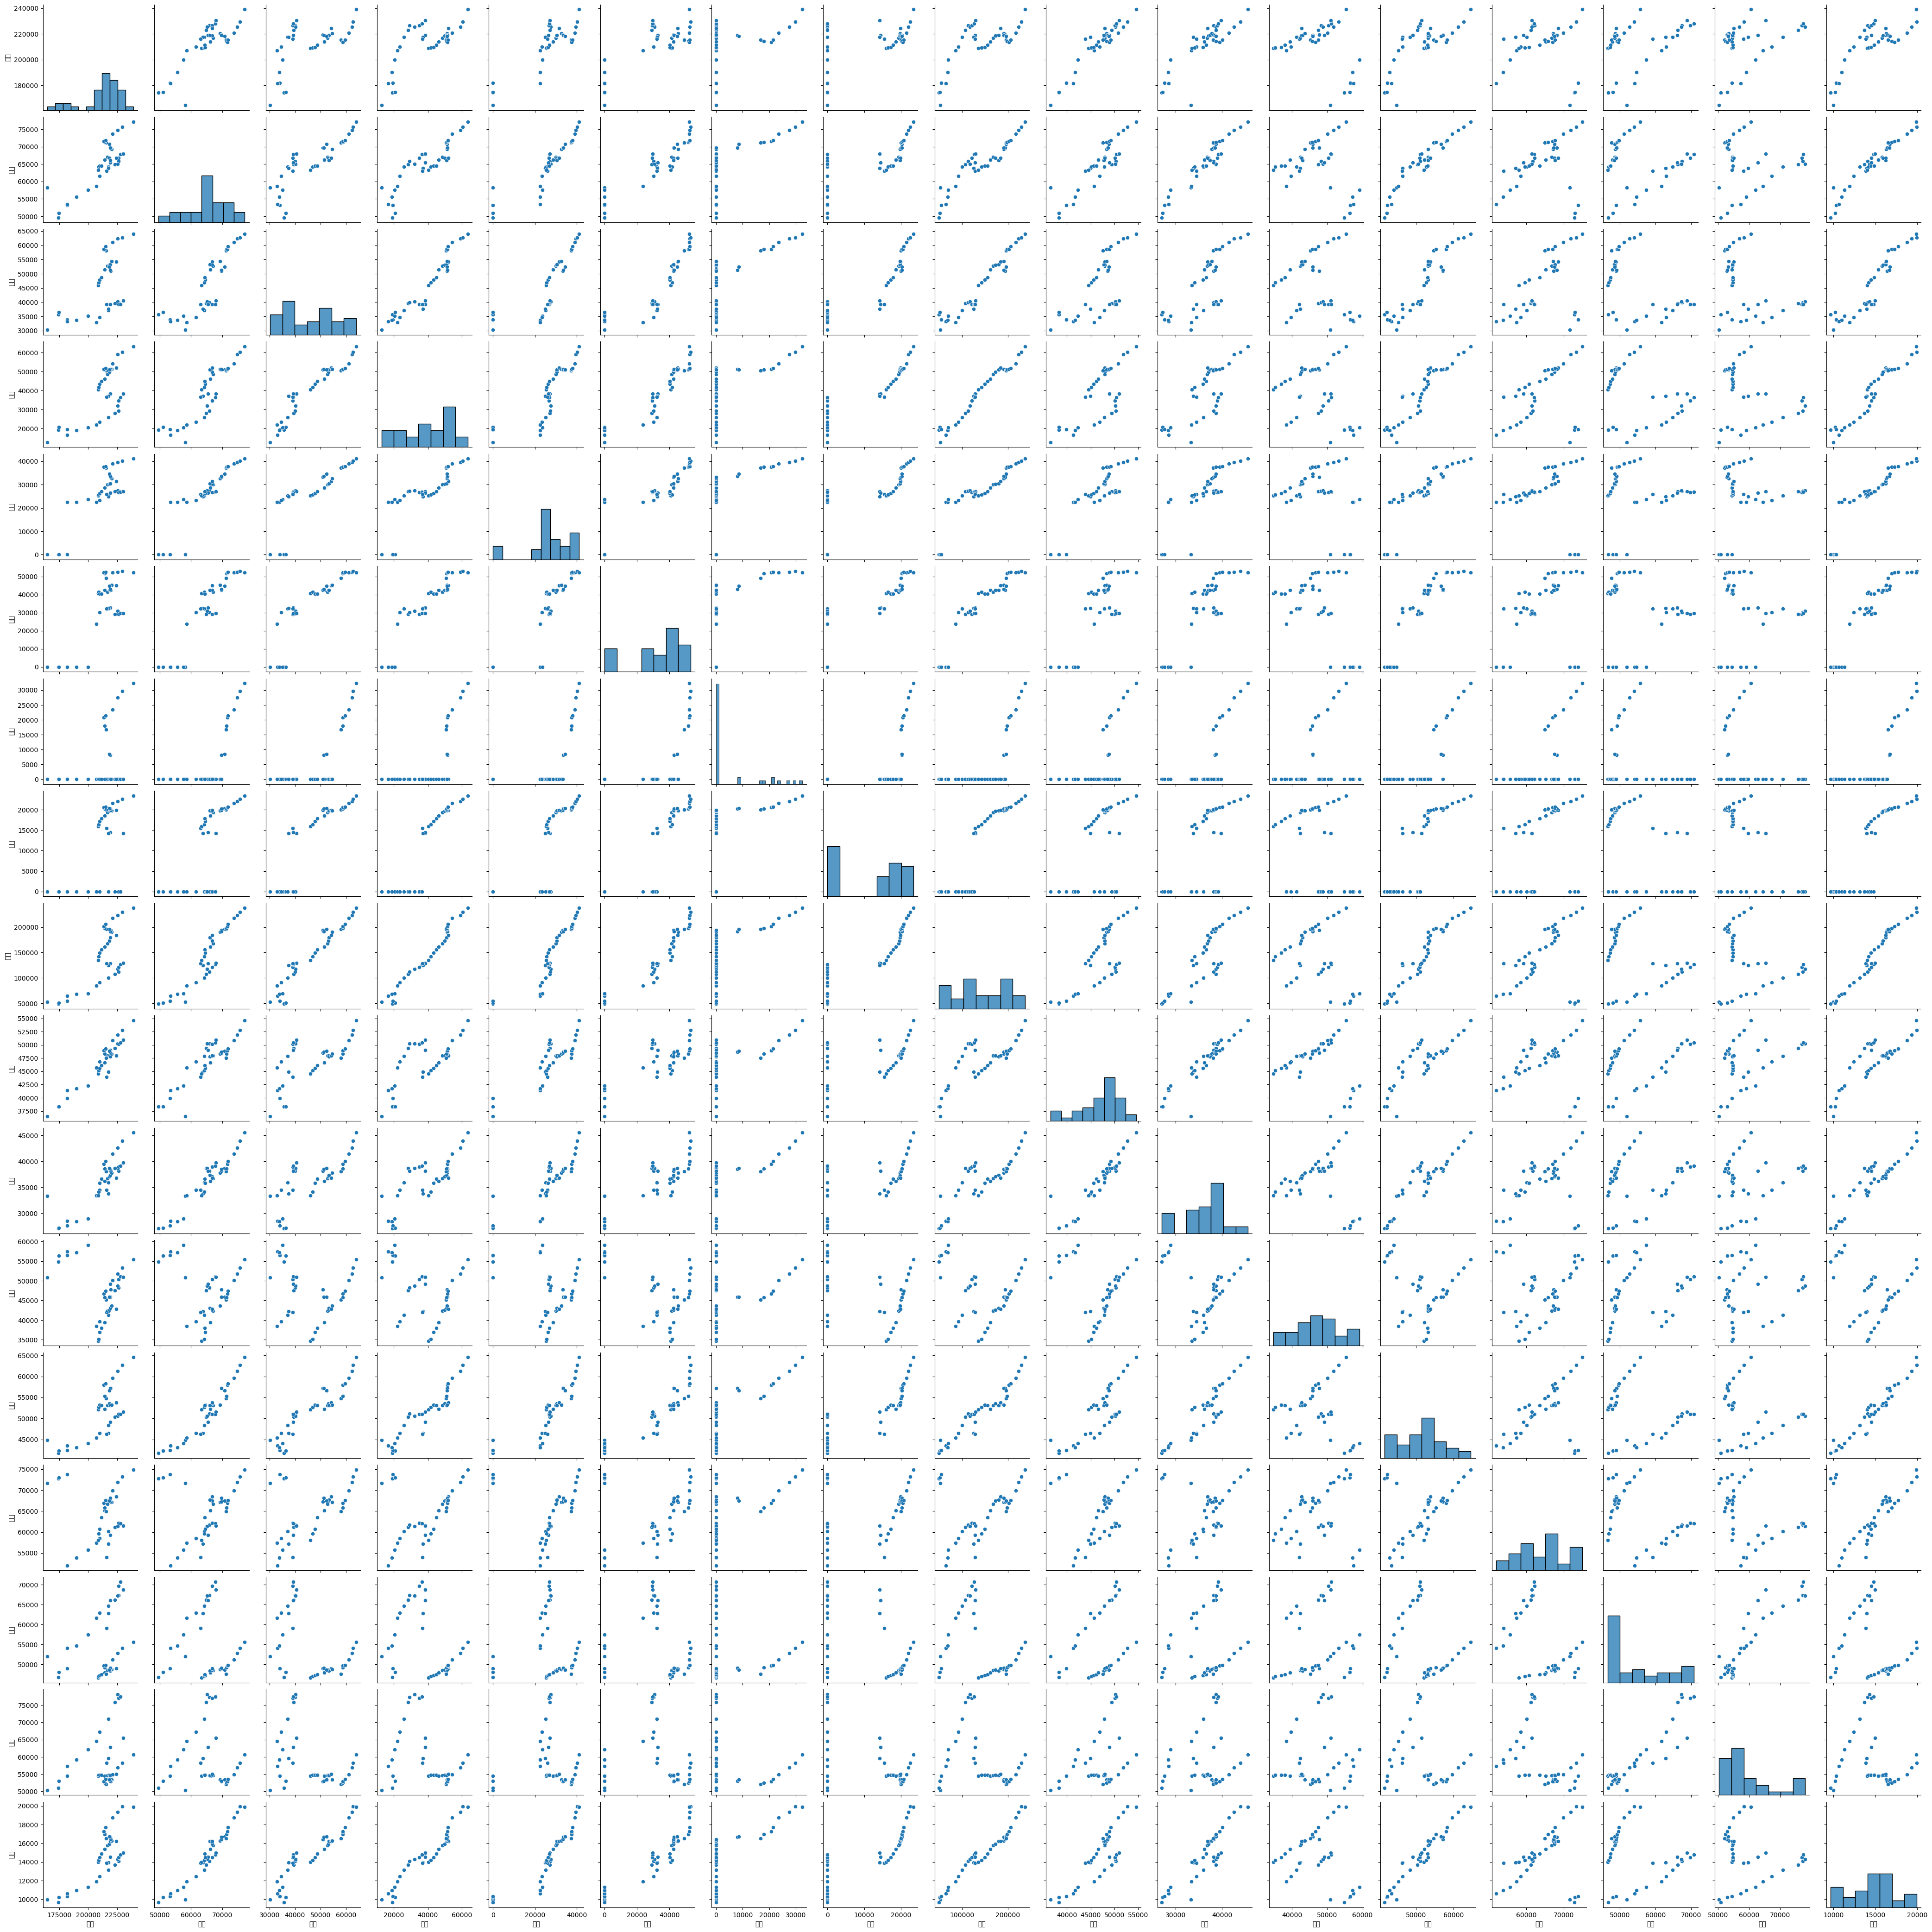

In [14]:
sb.pairplot(data= df, vars=['서울','부산','대구','인천','광주','대전','세종','울산','경기','강원','충북','충남','경북','경남','전북','전남','제주'])
plt.show()